# LECTURE 3 - REGRESSION - MERCEDES CAR PRICES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

C:\Users\tolgakilinckaya\AppData\Local\Temp\ipykernel_6516\3001430458.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Analyzing the Data

In [2]:
dataFrame = pd.read_excel("merc.xlsx") #Reading Excel file

In [3]:
dataFrame.head() #Top 5 data of dataset

,year,price,mileage,tax,mpg,engineSize
0,2005,5200,63000,325,32.1,1.8
1,2017,34948,27000,20,61.4,2.1
2,2016,49948,6200,555,28.0,5.5
3,2016,61948,16000,325,30.4,4.0
4,2016,73948,4000,325,30.1,4.0


In [4]:
dataFrame.describe() #Count, mean, standard deviation, min-max values of dataset

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


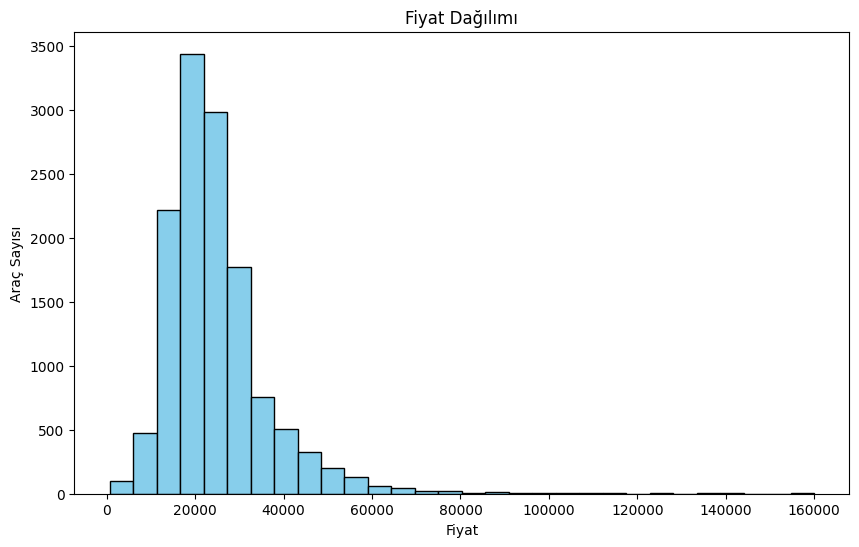

In [5]:
plt.figure(figsize=(10,6))
plt.hist(dataFrame['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Fiyat Dağılımı')
plt.xlabel('Fiyat')
plt.ylabel('Araç Sayısı')
plt.show()

In [6]:
dataFrame.corr()["price"].sort_values() #Other car features correlation with price

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

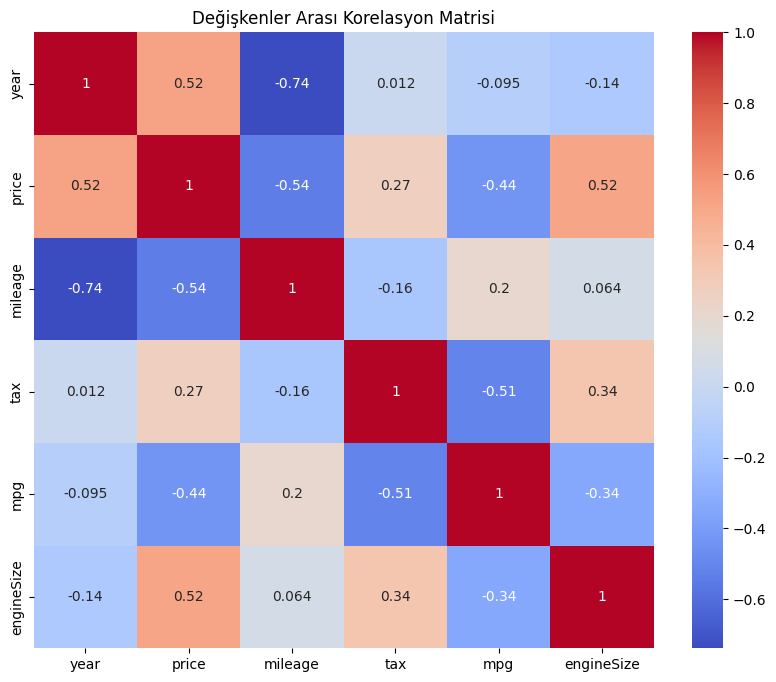

In [7]:
correlation_matrix = dataFrame.corr()
plt.figure(figsize=(10,8))
sbn.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Değişkenler Arası Korelasyon Matrisi')
plt.show()

C:\Users\tolgakilinckaya\AppData\Local\Temp\ipykernel_6516\1228130837.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_tax_by_engine = dataFrame.groupby(pd.cut(dataFrame['engineSize'],


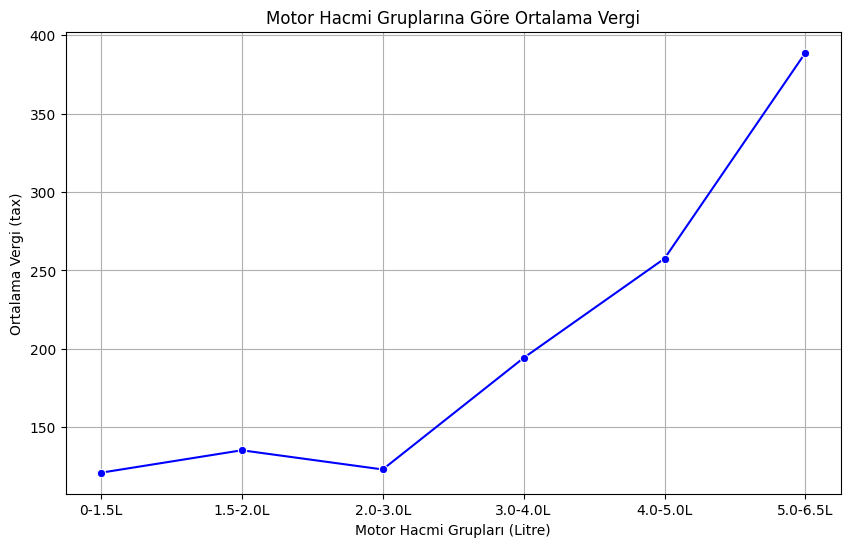

In [8]:
avg_tax_by_engine = dataFrame.groupby(pd.cut(dataFrame['engineSize'], 
                                            bins=[0, 1.5, 2.0, 3.0, 4.0, 5.0, 6.5],
                                            labels=['0-1.5L', '1.5-2.0L', '2.0-3.0L', '3.0-4.0L', '4.0-5.0L', '5.0-6.5L']
                                           ))['tax'].mean().reset_index()

# Lineplot çizimi
plt.figure(figsize=(10, 6))
sbn.lineplot(x='engineSize', y='tax', data=avg_tax_by_engine, marker='o', color='b')
plt.title('Motor Hacmi Gruplarına Göre Ortalama Vergi')
plt.xlabel('Motor Hacmi Grupları (Litre)')
plt.ylabel('Ortalama Vergi (tax)')
plt.grid()
plt.show()

<Axes: xlabel='mileage', ylabel='price'>

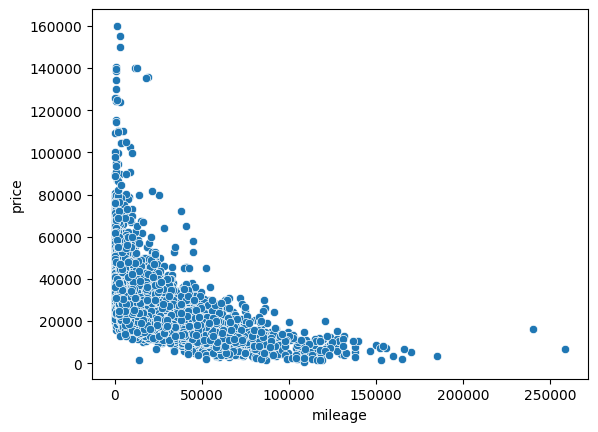

In [9]:
sbn.scatterplot(x="mileage",y="price",data=dataFrame) #Price chart of vehicles by mileage

## Correction of Data

In [10]:
nintyNineDf = dataFrame.sort_values("price",ascending=False).iloc[131:] #The most expensive %1 car in the first dataset, I removed it to smooth out the dataset.

In [11]:
nintyNineDf.describe() 

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\tolgakilinckaya\AppData\Local\Temp\ipykernel_6516\1766678137.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sbn.distplot(nintyNineDf["price"], kde=False, norm_hist=True)


<Axes: xlabel='price'>

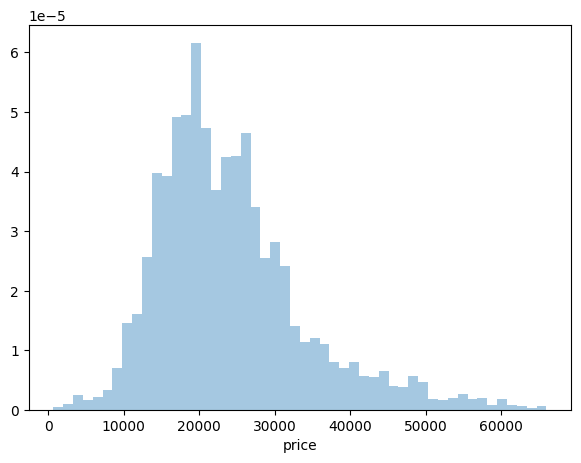

In [12]:
plt.figure(figsize=(7,5))
sbn.distplot(nintyNineDf["price"], kde=False, norm_hist=True)

In [13]:
average_price_by_year = nintyNineDf.groupby("year")["price"].mean() #The average price of the new data set over the years, the cars from 1970 that stand out here.
print(average_price_by_year)

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64


In [14]:
dataFrame = nintyNineDf

In [15]:
dataFrame = dataFrame[dataFrame.year != 1970] #Removal of salient 1970 model cars from the dataset

In [16]:
dataFrame.groupby("year")["price"].mean()

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [17]:
y = dataFrame["price"].values
x = dataFrame.drop("price",axis=1).values #Assigning the x and y arrays to be used for the model

In [18]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [19]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

## Organizing the Data According to the Model

In [20]:
from sklearn.model_selection import train_test_split 

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)#Splitting the data needed to train and test the model: %30 testing - %70 training

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
x_train = scaler.fit_transform(x_train)

In [25]:
x_test = scaler.transform(x_test)

## Creating the Model

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [27]:
x_train.shape

(9090, 5)

In [88]:
model = Sequential()

model.add(Dense(12,activation="relu", input_shape=(5,))) 
model.add(Dense(24,activation="relu")) #The model consists of 5 hidden layers containing 3*12 and 2*24 neurons(dense).
model.add(Dense(48,activation="relu")) #ReLU activation model selected 
model.add(Dense(24,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1)) #Output layer

model.compile(optimizer="adam",loss="mse") 

C:\Users\tolgakilinckaya\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_31 (Dense)                     │ (None, 12)                  │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 24)                  │             312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 48)                  │           1,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 24)                  │           1,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 12)                  │             300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,073 (12.00 KB)

 Trainable params: 3,073 (12.00 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test), batch_size=250, epochs=300) #The model is trained here, given to the model in 250 (batch_size) data packets, 300 (epochs) times are passed over the data set.

Epoch 1/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 676673408.0000 - val_loss: 682801536.0000
Epoch 2/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 677398528.0000 - val_loss: 681922048.0000
Epoch 3/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 666709376.0000 - val_loss: 674395584.0000
Epoch 4/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 657624256.0000 - val_loss: 632440384.0000
Epoch 5/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 582824000.0000 - val_loss: 484681120.0000
Epoch 6/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 413730944.0000 - val_loss: 203654672.0000
Epoch 7/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 150208784.0000 - val_loss: 90396336.0000
Epoch 8/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 87062560.0000 - val_loss: 88878928.0000
Epoch 9/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 87514208.0000 - val_loss: 87591072.0000
Epoch 10/300
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 85725184.0000 - val_loss: 86375424.0

## Evaluation of the Model

In [91]:
loss_data = pd.DataFrame(model.history.history)

In [92]:
loss_data.head()
loss_data.head(-1)

,loss,val_loss
0,674349888.0,682801536.0
1,674028032.0,681922048.0
2,671016448.0,674395584.0
3,651141824.0,632440384.0
4,566620736.0,484681120.0
...,...,...
294,17905146.0,19708694.0
295,17900092.0,19757718.0
296,17863420.0,19864724.0
297,17860892.0,19701126.0


<Axes: >

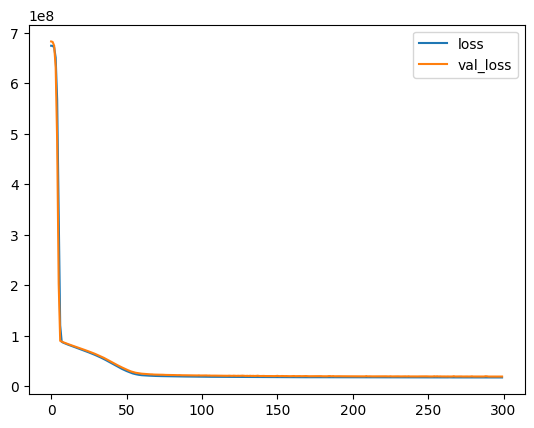

In [93]:
loss_data.plot() #Missing data and test result data are compared.

In [94]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [95]:
predictSerie = model.predict(x_test) #A new prediction is made by giving the test.

122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step


In [96]:
predictSerie

array([[25318.31 ],
       [21847.895],
       [15454.637],
       ...,
       [21444.02 ],
       [34111.9  ],
       [25423.982]], dtype=float32)

In [97]:
mean_absolute_error(y_test, predictSerie) #Calculate the average margin of error between the actual data and the prediction data. (+/- 3137 Pound)

3170.8265918068987

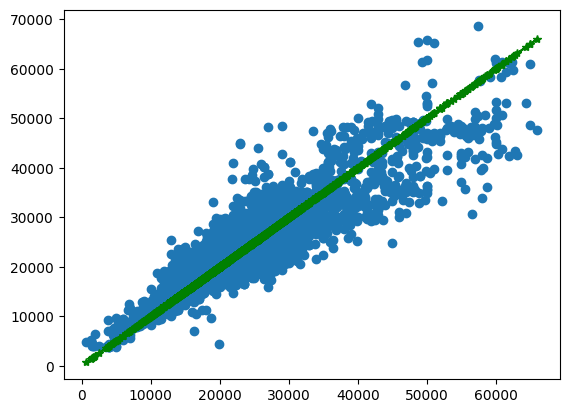

In [98]:
plt.scatter(y_test,predictSerie)
plt.plot(y_test,y_test,"g-*") #Looking at how much the graph deviates from what it should be.

In [99]:
dataFrame.iloc[5]

year           2018.0
price         64999.0
mileage       41102.0
tax             145.0
mpg              23.0
engineSize        5.5
Name: 8083, dtype: float64

In [100]:
newCarSeries = dataFrame.drop("price", axis=1).iloc[5] #Taking a car in the dataset.

In [101]:
newCarSeries = scaler.transform(newCarSeries.values.reshape(-1,5))

In [102]:
model.predict(newCarSeries) #It is given to the model to estimate the price of the new car. New Price Prediction: 62.891 Pound. Actual Price: 64.999 Pound. Margin of Error: 0.035

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[62891.105]], dtype=float32)

In [104]:
model.save('mercedes_predict.h5') #Saving the model